In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv('cluster_blobs.csv')

In [4]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

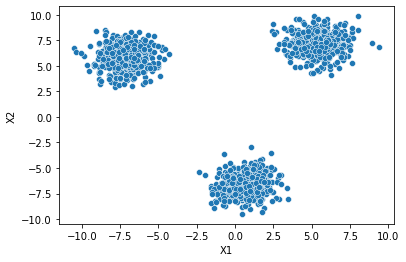

In [5]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [6]:
moons = pd.read_csv('cluster_moons.csv')

In [7]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

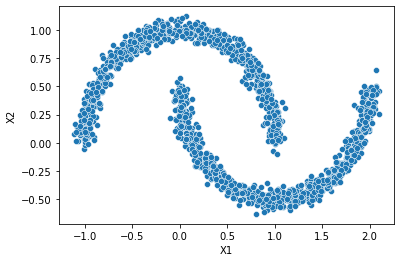

In [8]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [9]:
circles = pd.read_csv('cluster_circles.csv')

In [10]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

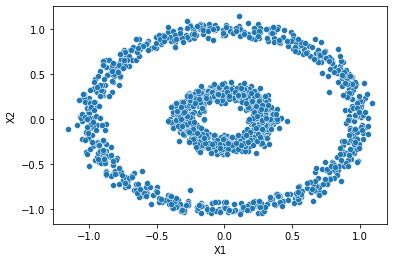

In [11]:
sns.scatterplot(data=circles,x='X1',y='X2')

In [12]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [13]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3)

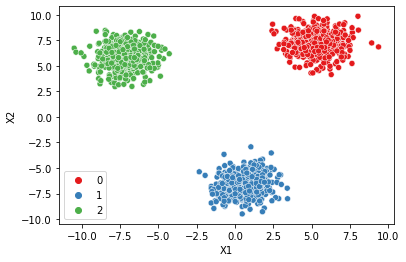

In [16]:
display_categories(model,blobs)

In [17]:
model = KMeans(n_clusters=2)

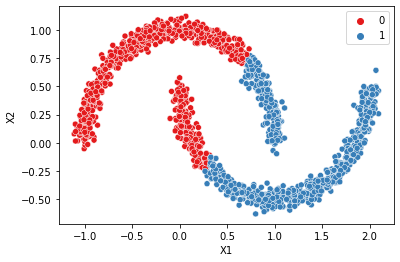

In [18]:
display_categories(model,moons)

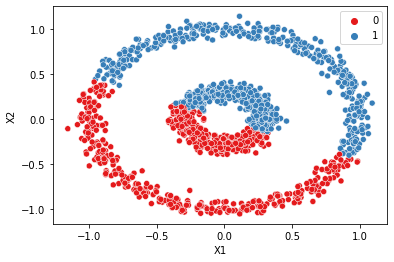

In [19]:
display_categories(model,circles)

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
model = DBSCAN()

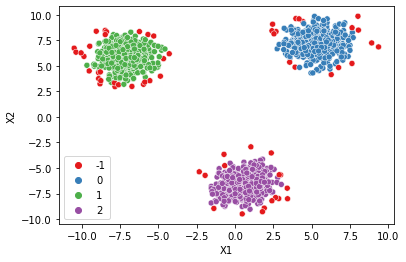

In [22]:
display_categories(model,blobs)

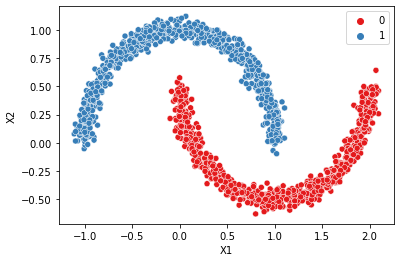

In [25]:
model = DBSCAN(eps=0.15)
display_categories(model,moons)

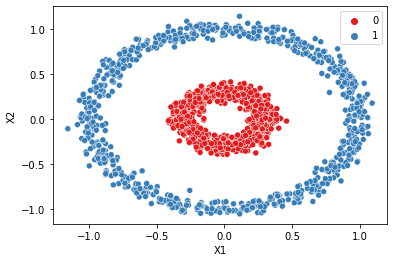

In [26]:
model = DBSCAN(eps=0.15)
display_categories(model,circles)

## Hypermarameter Tuning

In [27]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')

In [28]:
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

In [30]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [31]:
two_blobs_outliers

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


<AxesSubplot:xlabel='X1', ylabel='X2'>

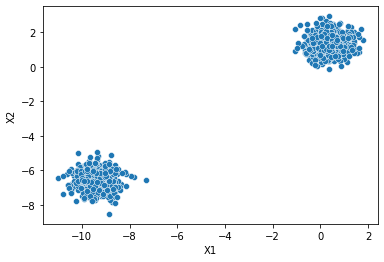

In [34]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

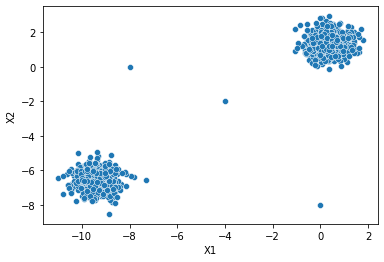

In [33]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [35]:
dbscan = DBSCAN()

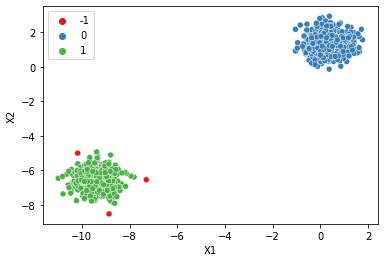

In [37]:
display_categories(dbscan,two_blobs)

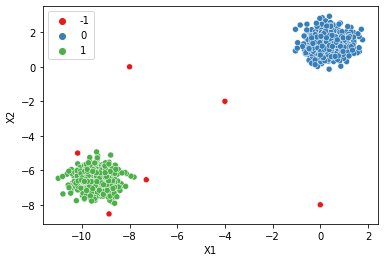

In [38]:
display_categories(dbscan,two_blobs_outliers)

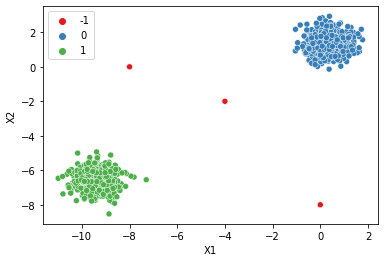

In [43]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [46]:
np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100

0.29910269192422734

In [54]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,7,200):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
            
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    outlier_percent.append(np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100)            

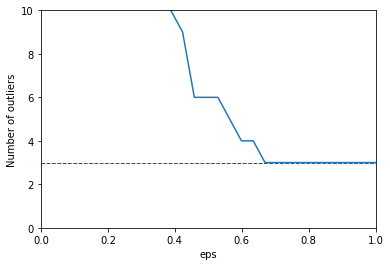

In [74]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers)
plt.ylabel('Number of outliers')
plt.xlabel('eps')
plt.hlines(y=3,xmin=0,xmax=2,color='red',ls='--',lw=1)
plt.ylim(0,10)
plt.xlim(0,1);

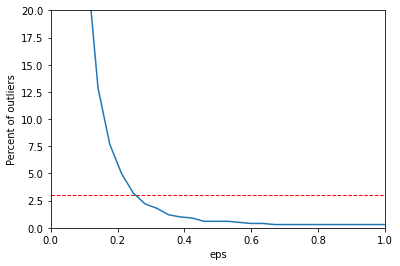

In [70]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.ylabel('Percent of outliers')
plt.xlabel('eps')
plt.hlines(y=3,xmin=0,xmax=2,color='red',ls='--',lw=1)
plt.ylim(0,20)
plt.xlim(0,1);

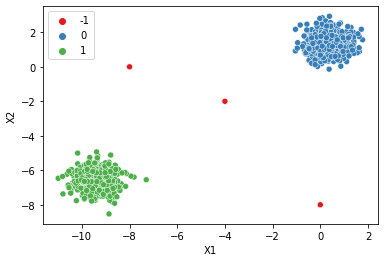

In [75]:
dbscan = DBSCAN(eps=0.7)
display_categories(dbscan,two_blobs_outliers)